“In this section, we load the data, validate data quality (missing values, duplicates, types), convert dates, remove non-informative identifiers, and prepare time-ordered datasets for EDA and modeling.”

In [1]:
import pandas as pd
import numpy as np
day_df = pd.read_csv("../data/raw/day.csv")
hour_df = pd.read_csv("../data/raw/hour.csv")

In [2]:
print(day_df.shape)

(731, 16)


In [3]:
print(hour_df.shape)

(17379, 17)


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Initial Cleaning

In [10]:
#Convert object type to datetime for date column
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [11]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
#Drop instant (ID column)
day_df.drop(columns=["instant"], inplace=True)
hour_df.drop(columns=["instant"], inplace=True)

In [14]:
#Missing values?
print(day_df.isna().sum())
print(hour_df.isna().sum())

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
#duplicates?
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

0
0


In [16]:
# Sort by time
day_df = day_df.sort_values("dteday").reset_index(drop=True)
hour_df = hour_df.sort_values(["dteday", "hr"]).reset_index(drop=True)

The variables casual and registered were removed prior to modeling because they are components of the target variable cnt and would introduce data leakage.

In [17]:
#Leakage columns dropping
hour_df.drop(columns=["casual", "registered"], inplace=True)
day_df.drop(columns=["casual", "registered"], inplace=True)

In [18]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [19]:
day_clean = day_df.copy()
hour_clean = hour_df.copy()

In [20]:
day_clean.to_csv("../data/raw/day_clean.csv", index=False)
hour_clean.to_csv("../data/raw/hour_clean.csv", index=False)

## Intro Machine Learning

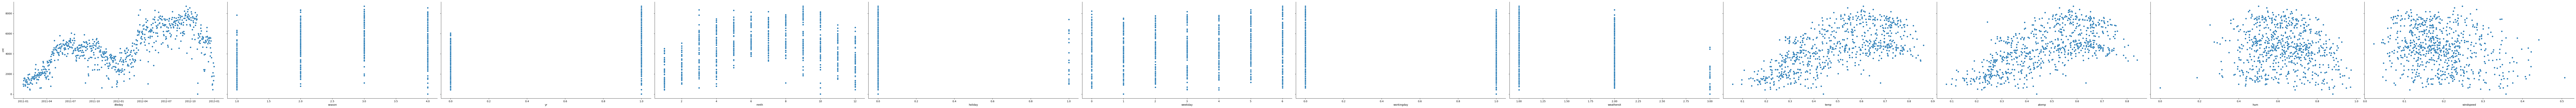

In [22]:
#Loading and preparing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(day_clean, y_vars=['cnt'], x_vars=day_clean.columns[:-1], kind='scatter')

In [23]:
features = day_clean.drop(columns = ["cnt", "dteday"])
target = day_clean["cnt"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [25]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
97,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992
503,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817
642,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546
498,2,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117
303,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350


In [26]:
y_train.head()

97     1471
503    7639
642    7328
498    6118
303    3669
Name: cnt, dtype: int64

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors=10) # K = 10

In [29]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [30]:
print(f"The accuracy of the model is {knn.score(X_test, y_test): .2f}")

The accuracy of the model is  0.74


In [31]:
knn.predict(X_test)

array([5713. , 4944.5, 1377.3, 1937. , 2908. , 2593.2, 4398.1, 4364.2,
       5244.4, 1795.1, 1673.8, 1785.5, 2589.4, 4900.5, 4646.8, 4905.5,
       6562. , 4801.4, 3228.6, 2525.7, 7426.6, 2775.8, 4480.9, 5654.4,
       2270.9, 6039.5, 4852.8, 5763.2, 5974. , 6172. , 1940.8, 6137.5,
       5229.2, 5751.2, 2486.9, 2387.9, 6246.8, 6143.5, 3412.2, 3919.4,
       5600.4, 1946.2, 5668.5, 3620.7, 7063.4, 6718.2, 2526.5, 5026.4,
       2727.4, 3148. , 5907.3, 6039.5, 4773.5, 6191. , 4561.3, 4415.6,
       4383.5, 6249.6, 6039.5, 2928.4, 6390.5, 3180.8, 5967. , 7042.4,
       6760.9, 3571.7, 5699.3, 5242.8, 6527.9, 5464.5, 6468.7, 6977.9,
       3847.1, 5769.8, 4586.8, 5054.3, 4307.4, 5879.5, 3890.1, 2768. ,
       5439.7, 4593.5, 4852.8, 1870.6, 4709.9, 6046. , 5254.5, 6036.8,
       5378.7, 4450.4, 1893.3, 2124.3, 6200.4, 6321.4, 5266.6, 1785.5,
       4854.3, 7026.7, 5430.9, 3639.2, 3955.6, 6317.7, 4480.4, 6336.7,
       4448.7, 4763.5, 6647.2, 6268.7, 4120.4, 2371.4, 4128. , 4561.3,
      

In [32]:
y_test.values

array([5923, 4592, 1248, 1360, 4075, 1817, 2659, 6234, 6857, 1167, 1538,
       1162, 1461, 4833, 4342, 4010, 7525, 6536, 3376, 2077, 7713, 1341,
       5259, 4460, 1977, 4549, 3387, 5058, 7907, 8120,  822, 5115, 6392,
       5202, 2209, 4023, 6861, 4840, 2744, 2914, 6624,  801, 4839, 3487,
       7580, 7436, 1951, 3351, 2832, 1693, 6043, 6966, 5572, 7421, 4576,
       3071, 3613, 7461, 7105, 3272, 7290, 4318, 4073, 8714, 7494, 1996,
       5202, 5382, 6536, 5566, 6572, 7264, 4996, 6597, 3267, 6606, 5847,
       6883, 2431, 1796, 4475, 5107, 5362, 1812, 5010, 7665, 4792, 6169,
       4459, 4274, 1263,  623, 6904, 7175, 2843, 1013,  627, 7261, 3574,
       3830, 4352, 6233, 5170, 7691, 3523, 4302, 7693, 7415, 6041, 2660,
       4191, 3542, 3544, 1635, 2169, 4548, 4763, 4451, 7359, 5936, 1712,
       4507, 2927, 2294, 4195, 4630, 1650, 7001, 3129, 3239,  605, 5464,
       1450, 4304, 4270, 6153, 7132, 4539, 4985, 5345, 4220, 4595, 5870,
       5499, 5423, 8294, 4334])